<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/Seance2_Manipulation_donnees_spatiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séance 2 / Manipulation de données spatiales

##Configuration de l'environnement de travail

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Instal contextily
!pip install contextily
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos


In [ ]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données
import matplotlib.pyplot as plt #Visualisation de données
import geopandas as gpd #Gestion données sptiales
import contextily as ctx #Fond de carte
import os
import numpy as np
import shapely

##Importer les données spatiales de la séance

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O velib.geojson https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Berlin&lang=fr
!wget -O IRIS.geojson https://data.iledefrance.fr/explore/dataset/iris/download/?format=geojson&refine.dep=75&timezone=Europe/Berlin&lang=fr 

### La couche IRIS

iris  ...                                           geometry
0  1203  ...  POLYGON ((2.35084 48.86334, 2.35095 48.86340, ...
1  1102  ...  POLYGON ((2.36789 48.85827, 2.36811 48.85739, ...
2  1601  ...  POLYGON ((2.35855 48.85022, 2.35757 48.85056, ...
3  1702  ...  POLYGON ((2.35166 48.84660, 2.35279 48.84595, ...
4  2102  ...  POLYGON ((2.33699 48.85387, 2.33692 48.85452, ...

[5 rows x 8 columns]

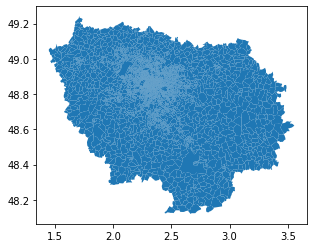

In [6]:
#Importer le couche des IRIS

IRIS= gpd.read_file("IRIS.geojson", encoding='utf-8')
IRIS.plot()
IRIS.head()

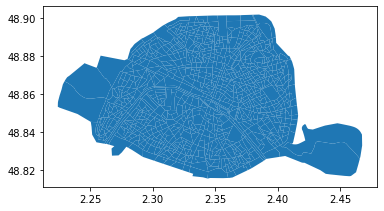

In [7]:
#Garder les IRIS de Paris

IRISPARIS = IRIS[(IRIS["dep"] == 75)]
IRISPARIS.plot()

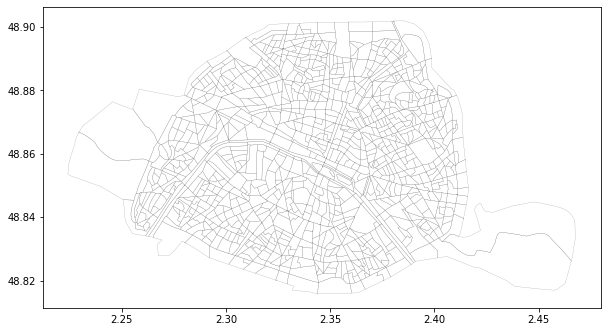

In [8]:
#Cartographier les IRIS en mode contours

IRISPARIS.boundary.plot(figsize=(10,10), linewidth=0.2, color = 'grey')

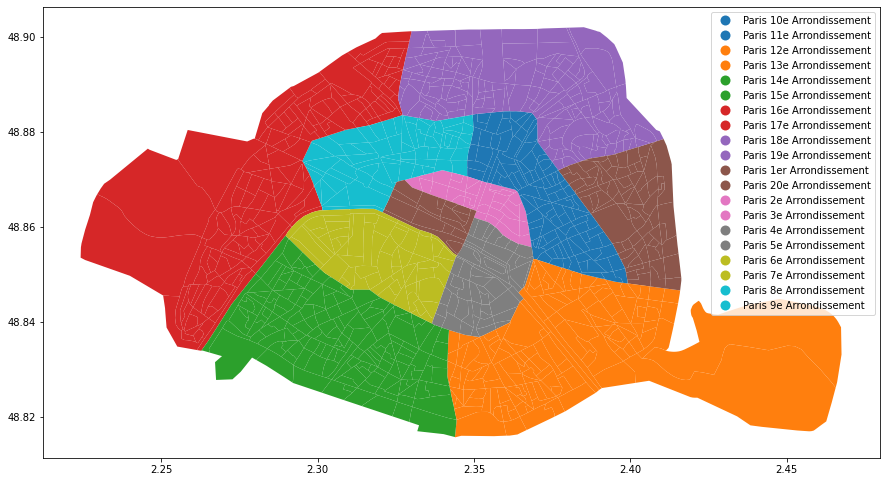

In [9]:
#Cartographier les IRIS en fonction de l'arrondissement

IRISPARIS.plot(column = 'nom_com', linewidth=0.5, figsize=(15,20), legend=True)

### La couche Vélibs

ebike  capacity  ... is_returning                  geometry
0      2        55  ...          OUI  POINT (2.33910 48.85376)
1      3        35  ...          OUI  POINT (2.27572 48.86598)
2      3        20  ...          OUI  POINT (2.39257 48.85591)
3      3        21  ...          OUI  POINT (2.33736 48.87930)
4      1        30  ...          OUI  POINT (2.38755 48.84086)

[5 rows x 13 columns]

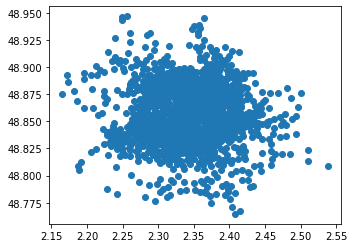

In [10]:
#Importer la couche des velibs

Velib= gpd.read_file("velib.geojson", encoding='utf-8')
Velib.plot()
Velib.head()

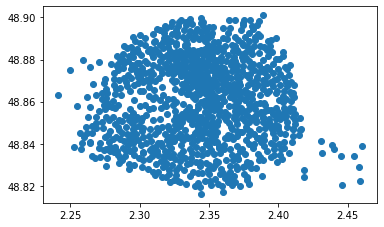

In [11]:
#Ne garder que les stations de Velibs de la ville de Paris (sélection par localisation)

VelibParis = gpd.overlay(Velib, IRISPARIS, how='intersection')
VelibParis.plot()


## Ecrire un jeu de données spatiales

https://geopandas.org/docs/user_guide/io.html

In [ ]:
#Ecrire un geojson

VelibParis.to_file("Velibs.geojson", driver="GeoJSON")

#Ecrire un shapefile

VelibParis.to_file("Velibs.shp")

#Ecrire un gpk

IRISPARIS.to_file("Paris.gpkg", layer='IRIS', driver="GPKG")
VelibParis.to_file("Paris.gpkg", layer='VelibParis', driver="GPKG")

## Calculer des statistique basiques (descriptives)

In [12]:
#Calculer des statistiques basiques pour tous les champs de la couche des vélibs

VelibParis.describe()

ebike    capacity  ...     insee_com     code_iris
count  998.000000  998.000000  ...    998.000000  9.980000e+02
mean     3.460922   32.243487  ...  75112.356713  7.511284e+08
std      3.456852   12.795194  ...      5.202905  5.411278e+04
min      0.000000    0.000000  ...  75101.000000  7.510101e+08
25%      1.000000   23.000000  ...  75109.000000  7.510933e+08
50%      2.000000   30.000000  ...  75113.000000  7.511350e+08
75%      5.000000   39.000000  ...  75117.000000  7.511765e+08
max     28.000000   74.000000  ...  75120.000000  7.512080e+08

[8 rows x 9 columns]

In [13]:
# Calculer le nombre de stations de vélibs

VelibParis["ebike"].size

998

In [14]:
# Calculer la somme totale des capacités

VelibParis["capacity"].sum()

32179

In [15]:
# Calculer la moyenne des capacités

VelibParis["capacity"].mean()

32.243486973947896

In [16]:
#Calculer le nombre total de station de vélibs, le nombre total de places de vélibs et le nombre moyen de vélibs par station
A=VelibParis['stationcode'].size
B=VelibParis['capacity'].sum()
C=VelibParis['capacity'].mean()

print(A,B,C)

998 32179 32.243486973947896


In [17]:
# Calculer le nombre de vélos disponibles et d'emplacement disponibles

## Cartographie thématique

In [ ]:
#Installer la librarie 'mapclassify' pour la cartographie thématique   > https://pysal.org/mapclassify/index.html

!pip install mapclassify
import mapclassify

Couleurs de ColorBrewer > https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/ggplot2/figures/101-rcolorbrewer-palette-rcolorbrewer-palettes-1.png 


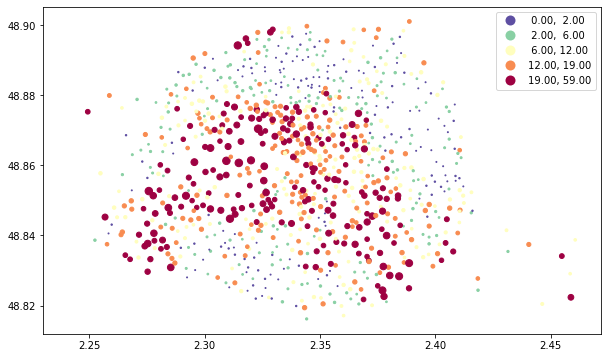

In [19]:
#Cartographier le nombre de vélibs disponibles par station

VelibParis.plot(figsize=(10,10),column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)


#### Ajouter un fond de carte

https://dlab.berkeley.edu/blog/adding-basemaps-python-contextily

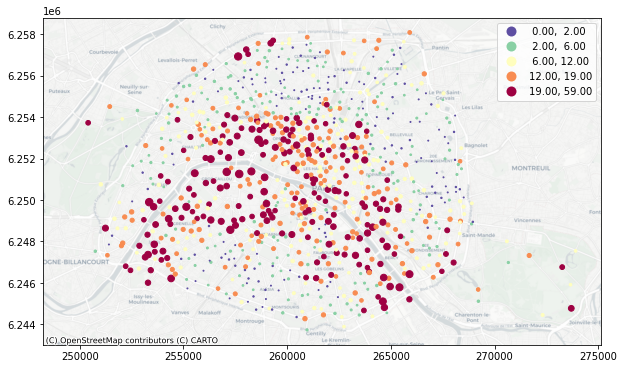

In [20]:
#Cartographier le nombre de vélibs disponibles par station avec un fond de carte

ax = VelibParis.to_crs('EPSG:3857').plot(figsize=(10,10),column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)


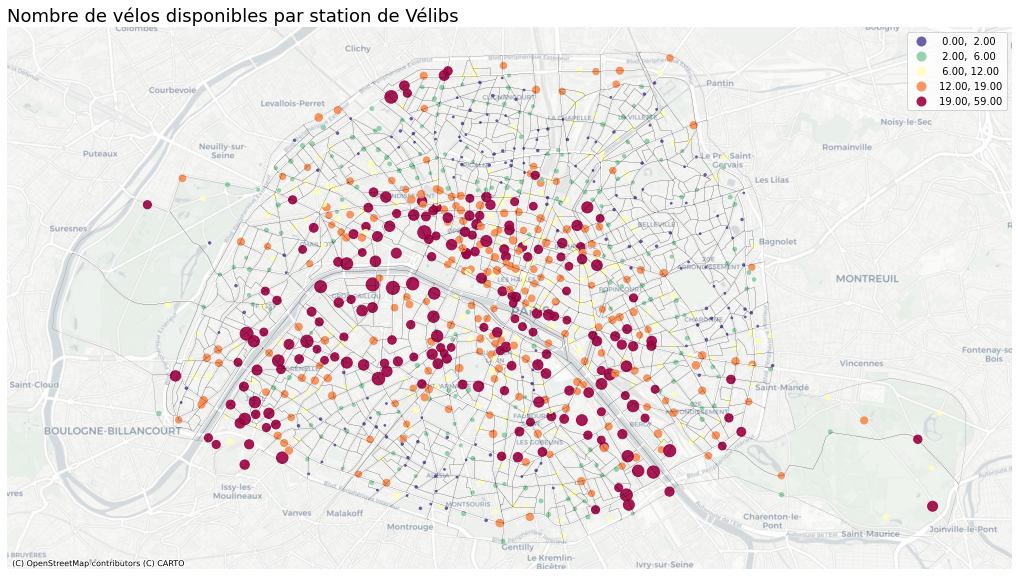

In [47]:
#Faire une carte avec deux couches

Carte1, ax = plt.subplots(figsize=(18,18))
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black')
VelibParis.to_crs('EPSG:3857').plot(ax=ax,column="numbikesavailable", markersize=VelibParis['numbikesavailable']*3 ,alpha=0.9, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.title('Nombre de vélos disponibles par station de Vélibs', loc='left', fontsize=18)
plt.show()

In [22]:
# Enreigistrer une carte en image

Carte1.savefig("Carte1.png")

## Jointure attributaire, calcul d'indicateurs, cartographie thématique

In [ ]:
#Téléchargement des datas depuis l'opendata (https://opendata.apur.org/datasets/recensement-iris-population/geoservice)
!wget -O population.csv https://opendata.arcgis.com/datasets/b2936d51b66b4213ae9351657fa230ac_0.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D


In [24]:
#Importer CSV to dataframe

population = pd.read_csv("population.csv", sep=',')
population.head(3)

OBJECTID    n_sq_ir  c_cainsee  ...           l_epci  shape_Length     shape_Area
0         1  930003891      93048  ...  T8 Est Ensemble   1927.186327  139705.062882
1         2  930003875      93048  ...  T8 Est Ensemble   1597.143066  106750.396820
2         3  930003874      93048  ...  T8 Est Ensemble   2494.946453  209582.967651

[3 rows x 72 columns]

In [25]:
# Ne garder que les colonne importantes

PopulationOK = population[["c_ir", "l_ir", "nb_densite", "nb_pop"]]
PopulationOK.head()

c_ir                       l_ir  nb_densite       nb_pop
0  930480801   Bel Air Grands Pêchers 1  218.821133  3057.042017
1  930480803   Bel Air Grands Pechers 3  191.134334  2040.366599
2  930480901  Ramenas Fabien Lagrange 1   93.199893  1953.311022
3  930480903  Ramenas Fabien Lagrange 3  160.958422  2538.624479
4  930481002         Branly Boissiere 2   67.042616  1750.317596

In [26]:
#Renommer les colonnes

PopulationOK = PopulationOK.rename(columns={'c_ir': 'Code_IRIS', 'l_ir':'Libelle', 'nb_densite':'Densite', 'nb_pop': 'Population'})
PopulationOK.head()

Code_IRIS                    Libelle     Densite   Population
0  930480801   Bel Air Grands Pêchers 1  218.821133  3057.042017
1  930480803   Bel Air Grands Pechers 3  191.134334  2040.366599
2  930480901  Ramenas Fabien Lagrange 1   93.199893  1953.311022
3  930480903  Ramenas Fabien Lagrange 3  160.958422  2538.624479
4  930481002         Branly Boissiere 2   67.042616  1750.317596

In [27]:
# Faire la jointure attributaire

IRISPARIS = IRISPARIS.merge(PopulationOK, left_on='code_iris', right_on='Code_IRIS')
IRISPARIS.head()

iris        nom_iris typ_iris  ...         Libelle     Densite   Population
0  1203  Sainte-Avoye 3        H  ...  Sainte-Avoye 3  472.642199  2015.719755
1  1102  Les Archives 2        H  ...  Les Archives 2  291.393448  1770.619263
2  1601    Notre Dame 1        H  ...    Notre-Dame 1  256.876979  2251.875659
3  1702  Saint-Victor 2        H  ...  Saint-Victor 2  327.717616  1573.355634
4  2102       Monnaie 2        H  ...       Monnaie 2  233.014964  1982.840801

[5 rows x 12 columns]

In [28]:
# Reprojeter la couche IRIS pour le calcul de surface

IRIS2154 = IRISPARIS.to_crs(2154)
IRIS2154.crs

<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [29]:
# Ajouter une colonne Surface à la couche des IRIS

IRIS2154["surface"] = IRIS2154['geometry'].area/1000000
IRIS2154.head(10) 

iris             nom_iris typ_iris  ...     Densite   Population   surface
0  1203       Sainte-Avoye 3        H  ...  472.642199  2015.719755  0.043852
1  1102       Les Archives 2        H  ...  291.393448  1770.619263  0.065652
2  1601         Notre Dame 1        H  ...  256.876979  2251.875659  0.091055
3  1702       Saint-Victor 2        H  ...  327.717616  1573.355634  0.048930
4  2102            Monnaie 2        H  ...  233.014964  1982.840801  0.082562
5  3805  Porte Saint-Denis 5        H  ...  328.762125  2401.320714  0.074924
6  4508            Bel Air 8        H  ...  394.824551  2391.356398  0.062161
7  5206        Croulebarbe 6        H  ...  311.844636  3782.421591  0.116169
8  5307       Montparnasse 7        H  ...  327.948320  1712.139620  0.049880
9  5616         Plaisance 16        H  ...  485.579417  2861.639113  0.059780

[10 rows x 13 columns]

In [30]:
#Calculer la densité de population des IRIS

IRIS2154["Densitebis"] = IRIS2154["Population"] / IRIS2154["surface"]
IRIS2154.head()

iris        nom_iris typ_iris  ...   Population   surface    Densitebis
0  1203  Sainte-Avoye 3        H  ...  2015.719755  0.043852  45966.316848
1  1102  Les Archives 2        H  ...  1770.619263  0.065652  26969.737316
2  1601    Notre Dame 1        H  ...  2251.875659  0.091055  24730.808835
3  1702  Saint-Victor 2        H  ...  1573.355634  0.048930  32155.289585
4  2102       Monnaie 2        H  ...  1982.840801  0.082562  24016.323154

[5 rows x 14 columns]

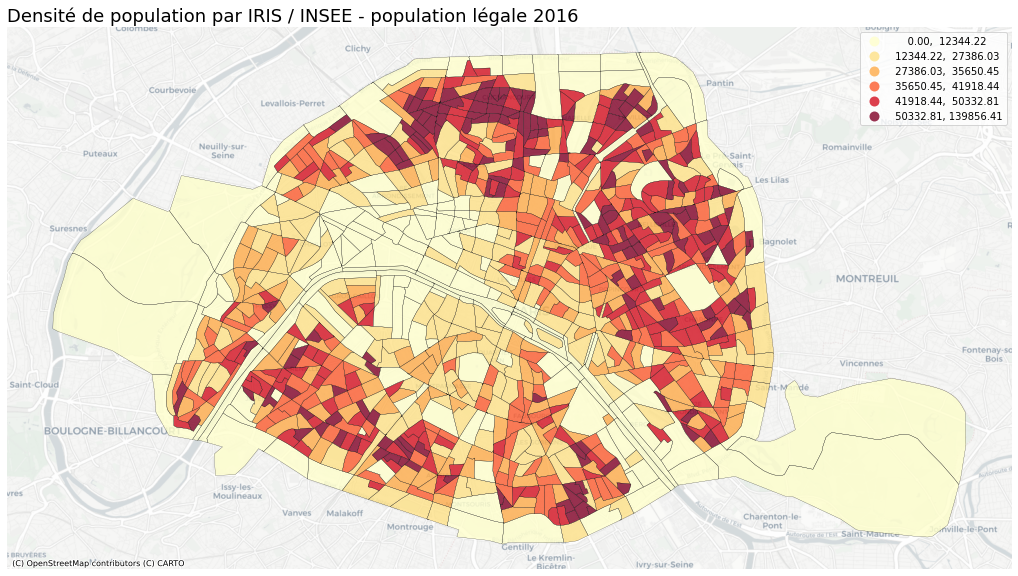

In [41]:
#Faire une carte des densité de population par IRIS

Carte2, ax = plt.subplots(figsize=(18,18))
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black')
IRIS2154.to_crs('EPSG:3857').plot(ax=ax, k=6, column='Densitebis', cmap='YlOrRd',scheme='quantiles', alpha= 0.8, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.title('Densité de population par IRIS / INSEE - population légale 2016', loc='left', fontsize=18)
plt.show()

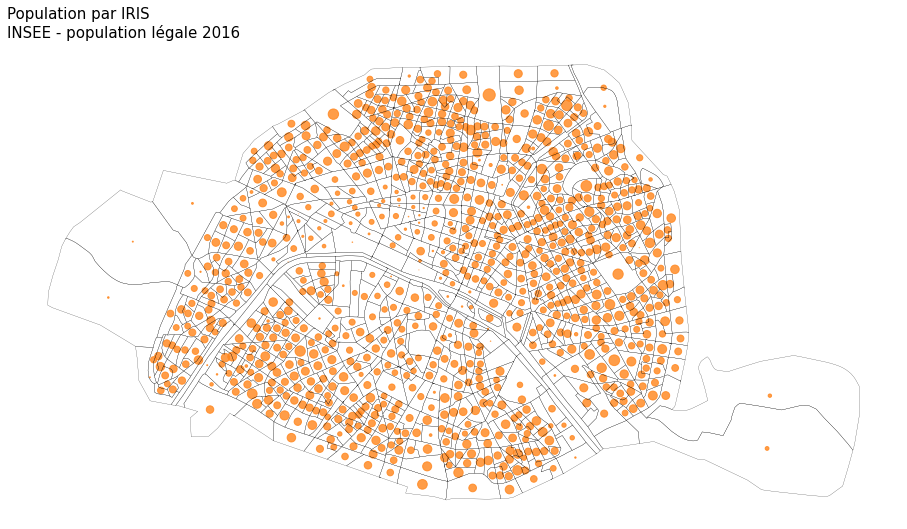

In [32]:
# Faire une carte des populations par IRIS

IRIScentro = IRIS2154.copy()
IRIScentro.geometry = IRIScentro['geometry'].centroid

Carte3, ax = plt.subplots(figsize=(16,14))
IRISPARIS.boundary.to_crs('EPSG:2154').plot(ax=ax, linewidth=0.2, color = 'black')
IRIScentro.plot(ax=ax, color="#FF851B", markersize=IRIScentro['Population']/50, alpha=0.8, categorical=False, legend=True)
ax.axis("off")
plt.title('Population par IRIS\nINSEE - population légale 2016', loc='left', fontsize=15)
plt.show()

## Dissolve(With Stat)

geometry  ...   Population
nom_com                                                                      ...             
Paris 10e Arrondissement  POLYGON ((2.37022 48.88240, 2.37024 48.88151, ...  ...  2401.320714
Paris 11e Arrondissement  POLYGON ((2.36664 48.86312, 2.36616 48.86396, ...  ...  2090.388246
Paris 12e Arrondissement  POLYGON ((2.36897 48.84252, 2.36810 48.84321, ...  ...  2391.356398
Paris 13e Arrondissement  POLYGON ((2.34155 48.82839, 2.34149 48.82857, ...  ...  3782.421591
Paris 14e Arrondissement  POLYGON ((2.30187 48.82500, 2.30132 48.82513, ...  ...  1712.139620

[5 rows x 11 columns]

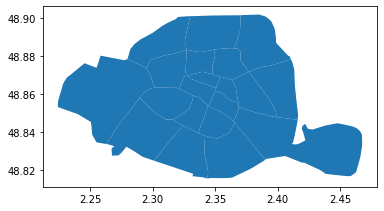

In [48]:
# Créer une couche des arrondissements

ARDT = IRISPARIS.dissolve(by='nom_com')
ARDT.plot()
ARDT.head()

In [49]:
# Créer une couche des arrondissements avec une agrégation statistiques (Population)

ARDT = IRIS2154.dissolve(by='insee_com', aggfunc='sum')
ARDT.head()


geometry  ...     Densitebis
insee_com                                                     ...               
75101      POLYGON ((651906.000 6861749.600, 651826.500 6...  ...  196419.344299
75102      POLYGON ((650836.900 6863382.070, 650766.800 6...  ...  328710.884634
75103      POLYGON ((652319.300 6862646.600, 652328.020 6...  ...  557159.554395
75104      POLYGON ((652234.790 6861585.390, 652145.040 6...  ...  359457.988367
75105      POLYGON ((651328.600 6860229.400, 651363.510 6...  ...  834564.296242

[5 rows x 9 columns]

In [50]:
ARDT["Population"].sum()

2206488.0


## Exercice avec les données de logement des IRIS

https://opendata.apur.org/datasets/recensement-iris-logement/data


* Produire une carte avec en cercle proportionnels le nombre de logement sociaux 
* Produire une carte avec en aplat de couleur le taux de logement vacant



In [ ]:
#Téléchargement des datas depuis l'opendata (https://opendata.apur.org/datasets/recensement-iris-population/geoservice)
!wget -O logement.csv https://opendata.arcgis.com/datasets/a57b54a5ae1046068a203d13d744343b_2.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D

In [53]:
#Importer CSV to dataframe

logement = pd.read_csv("logement.csv", sep=',')
logement.head(3)

OBJECTID    n_sq_ir  c_cainsee  ...           l_epci  shape_Length     shape_Area
0         1  930003891      93048  ...  T8 Est Ensemble   1927.186327  139705.062882
1         2  930003875      93048  ...  T8 Est Ensemble   1597.143066  106750.396820
2         3  930003874      93048  ...  T8 Est Ensemble   2494.946453  209582.967651

[3 rows x 87 columns]

In [54]:
# Ne garder que les colonne importantes

LogementOK = logement[["c_ir", "l_ir", "nb_log", "nb_logvac", "nb_loc_social"]]
LogementOK.head()

c_ir                       l_ir       nb_log   nb_logvac  nb_loc_social
0  930480801   Bel Air Grands Pêchers 1  1215.000069   42.734671     382.744007
1  930480803   Bel Air Grands Pechers 3   827.500048   27.783878     548.040149
2  930480901  Ramenas Fabien Lagrange 1  1007.500054   83.311007     135.500873
3  930480903  Ramenas Fabien Lagrange 3  1174.500064  104.873548     349.870857
4  930481002         Branly Boissiere 2   713.000038   50.006217     139.873760

In [55]:
# Faire la jointure attributaire

IRISPARIS = IRISPARIS.merge(LogementOK, left_on='code_iris', right_on='c_ir')
IRISPARIS.head(2)

iris        nom_iris typ_iris  ...       nb_log  nb_logvac nb_loc_social
0  1203  Sainte-Avoye 3        H  ...  1422.496110   76.29437    423.105942
1  1102  Les Archives 2        H  ...  1236.496915   90.96071     26.879651

[2 rows x 17 columns]

In [56]:
#Calculer le taux de logements vacant

IRISPARIS["txlogvac"] = IRISPARIS["nb_logvac"] / IRISPARIS["nb_log"] *100
IRISPARIS.head()

iris        nom_iris typ_iris  ...   nb_logvac  nb_loc_social  txlogvac
0  1203  Sainte-Avoye 3        H  ...   76.294370     423.105942  5.363415
1  1102  Les Archives 2        H  ...   90.960710      26.879651  7.356323
2  1601    Notre Dame 1        H  ...  235.581209       8.047020  9.263973
3  1702  Saint-Victor 2        H  ...   74.446208       0.000000  5.996439
4  2102       Monnaie 2        H  ...  107.369763      15.538301  5.218478

[5 rows x 18 columns]

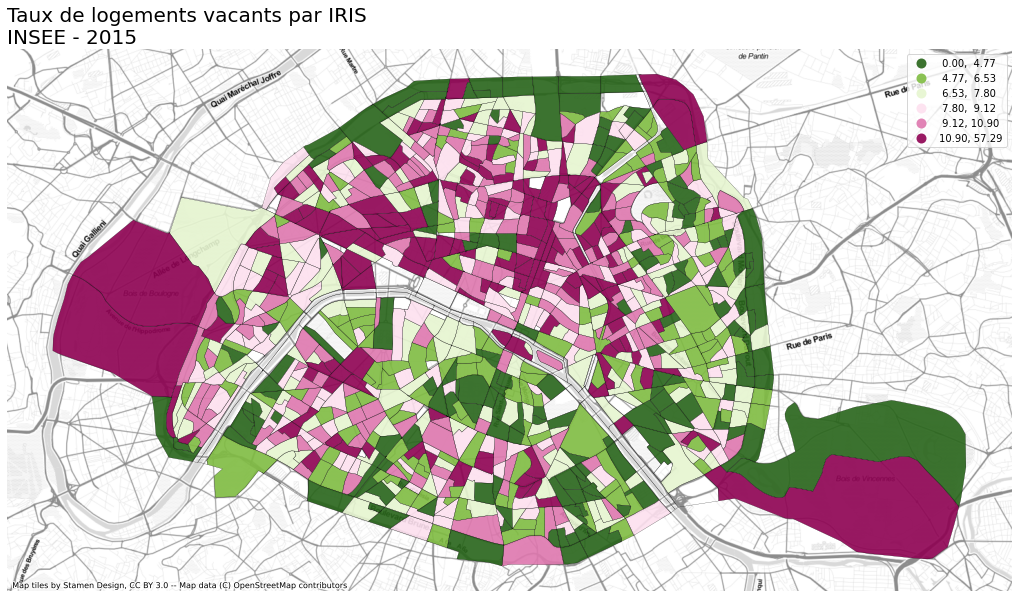

In [65]:
#Faire une carte du taux de logements vacants par IRIS

Carte4, ax = plt.subplots(figsize=(18,16))
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.2, color = 'black')
IRISPARIS.to_crs('EPSG:3857').plot(ax=ax, k=6, column='txlogvac', cmap='PiYG_r',scheme='quantiles', alpha=0.9, legend=True)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.axis("off")
plt.title('Taux de logements vacants par IRIS\nINSEE - 2015', loc='left', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  after removing the cwd from sys.path.


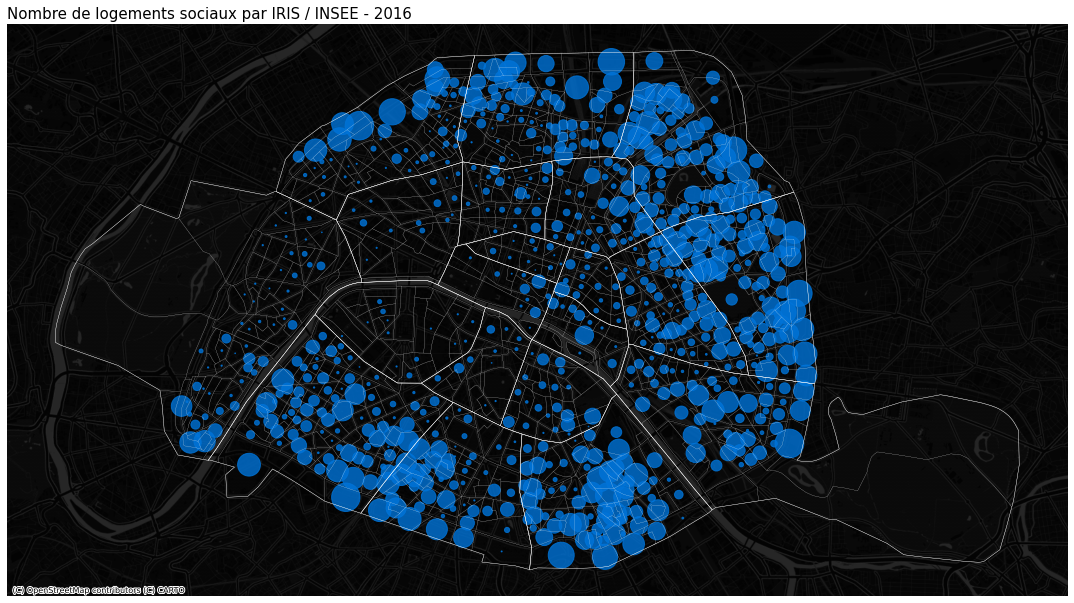

In [68]:
# Faire une carte du nombre de logement sociaux par IRIS

IRIScentro = IRISPARIS.copy()
IRIScentro.geometry = IRIScentro['geometry'].centroid

Carte5, ax = plt.subplots(figsize=(19,19))
ARDT.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.4, color = 'white')
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'white')
IRIScentro.to_crs('EPSG:3857').plot(ax=ax, color="#0074D9", markersize=IRIScentro['nb_loc_social']/2, alpha=0.8, categorical=False, legend=True)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels)
ax.axis("off")
plt.title('Nombre de logements sociaux par IRIS / INSEE - 2016', loc='left', fontsize=15)
plt.show()